In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read .csv files
wc = pd.read_csv('datasets/World Cup 2018 Dataset.csv')
results = pd.read_csv('datasets/results.csv')

In [4]:
wc.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [6]:
# Adding new column for winner of each match
winner = []
for i in range(len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Tie')
results['winning_team'] = winner

# Adding new column for goal difference in matches
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [7]:
# Slice the dataset and create new 'england' Dataframe
df = results[(results['home_team'] == 'England') | (results['away_team'] == 'England')]
england = df.iloc[:]
england.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [8]:
# Loop for creating a new column 'year'
year = []
for row in england['date']:
    year.append(int(row[:4]))
england['match_year'] = year

# Slicing the dataset to see how many matches took place from 1930 onwards (the year of the first ever World Cup)
england_1930 = england[england.match_year >= 1930]
england_1930.count()

date               810
home_team          810
away_team          810
home_score         810
away_score         810
tournament         810
city               810
country            810
winning_team       810
goal_difference    810
match_year         810
dtype: int64

([<matplotlib.axis.XTick at 0x1e2ce760160>],
 <a list of 1 Text xticklabel objects>)

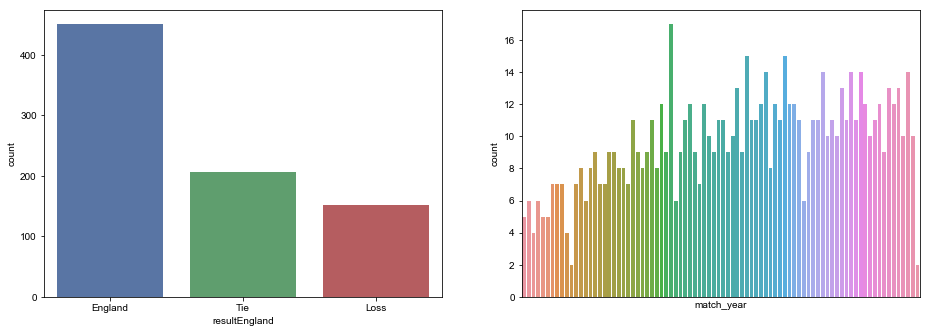

In [9]:
# Create auxiliary DataFrame for substituting other countries' names for 'Loss'
winrate = []
for row in england_1930['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate.append('Loss')
    else:
        winrate.append(row)
dfwinrate = pd.DataFrame(winrate, columns=['resultEngland'])

# Plot with Seaborn and show
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15.7, 5.27)
sns.set(style="darkgrid")
sns.countplot(x='resultEngland', data=dfwinrate, ax = ax[0])
sns.countplot(x='match_year', data=england_1930, ax = ax[1])
plt.xticks(np.arange(min(england_1930.match_year), max(england_1930.match_year), 100))


#### 3.1) Narrowing the 2018 World Cup participants

In [10]:
# Create a DF with all participating teams
wc_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']

# Filter the 'results' dataframe to show only teams in this years' world cup, from 1930 onwards
df_teams_home = results[results['home_team'].isin(wc_teams)]
df_teams_away = results[results['away_team'].isin(wc_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()


date               20565
home_team          20565
away_team          20565
home_score         20565
away_score         20565
tournament         20565
city               20565
country            20565
winning_team       20565
goal_difference    20565
dtype: int64

In [11]:
# Loop for creating a new column 'year'
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year

# Slicing the dataset to see how many matches took place from 1930 onwards (the year of the first ever World Cup)
df_teams30 = df_teams[df_teams.match_year >= 1930]
df_teams30.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
1230,1930-01-01,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1,1930
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2,1930
1238,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2,1930
1240,1930-03-23,France,Switzerland,3,3,Friendly,Colombes,France,Tie,0,1930


In [12]:
df_teams30 = df_teams30.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams30.head(5)

,home_team,away_team,winning_team
1230,Spain,Czechoslovakia,Spain
1231,Portugal,Czechoslovakia,Portugal
1237,Portugal,France,Portugal
1238,Germany,Italy,Italy
1240,France,Switzerland,Tie


In [13]:
df_teams30 = df_teams30.reset_index(drop=True)
df_teams30.loc[df_teams30.winning_team == df_teams30.home_team, 'winning_team']= 2
df_teams30.loc[df_teams30.winning_team == 'Tie', 'winning_team']= 1
df_teams30.loc[df_teams30.winning_team == df_teams30.away_team, 'winning_team']= 0

df_teams30.head()

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,2
1,Portugal,Czechoslovakia,2
2,Portugal,France,2
3,Germany,Italy,0
4,France,Switzerland,1


In [14]:
from sklearn.model_selection import train_test_split

# Get dummy variables
final = pd.get_dummies(df_teams30, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.571
Test set accuracy:  0.555


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


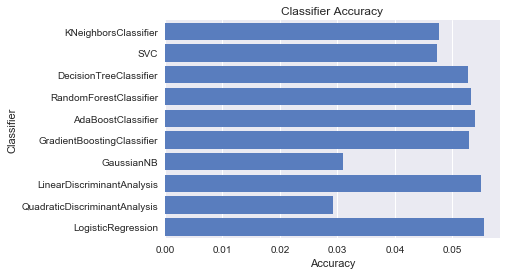

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

# Loop to do fit and predictions of each classifier into the dataset
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    # Storing each score into a dict
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

# Storing the results in a DataFrame to be visualized
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

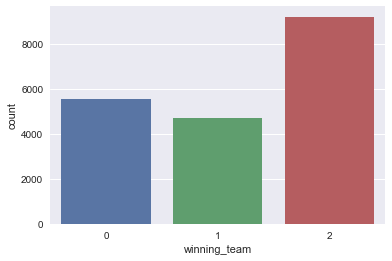

In [17]:
sns.countplot(x='winning_team', data=df_teams30)

In [18]:
# Loading new datasets
ranking = pd.read_csv('datasets/fifa_rankings.csv') # Obtained from https://us.soccerway.com/teams/rankings/fifa/?ICID=TN_03_05_01
fixtures = pd.read_csv('datasets/fixtures.csv') # Obtained from https://fixturedownload.com/results/fifa-world-cup-2018

# List for storing the group stage games
pred_set = []

In [19]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [20]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [21]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Tie")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Tie: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")


Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.695
Probability of Tie:  0.195
Probability of Saudi Arabia winning:  0.110

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.578
Probability of Tie:  0.323
Probability of Egypt winning:  0.099

Iran and Morocco
Tie
Probability of Iran winning:  0.315
Probability of Tie:  0.366
Probability of Morocco winning:  0.319

Portugal and Spain
Tie
Probability of Portugal winning:  0.332
Probability of Tie:  0.345
Probability of Spain winning:  0.323

France and Australia
Winner: France
Probability of France winning:  0.605
Probability of Tie:  0.232
Probability of Australia winning:  0.163

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.821
Probability of Tie:  0.141
Probability of Iceland winning:  0.039

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.470
Probability of Tie:  0.169
Probability of Denmark winning:  0.361

Croatia and Nigeria
Winner: Croatia
P

In [23]:
# List of tuples before we arrange the teams in home and away
group_16 = [('France', 'Argentina'),
            ('Uruguay', 'Portugal'),
            ('Spain', 'Russia'),
            ('Croatia', 'Denmark'),
            ('Brazil', 'Mexico'),
            ('Belgium', 'Japan'),
            ('Sweden', 'Switzerland'),
            ('Colombia', 'England')]

In [24]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Tie")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Tie: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

###                                       Round of 16

In [25]:
clean_and_predict(group_16, ranking, final, logreg)

Argentina and France
Winner: Argentina
Probability of Argentina winning:  0.614
Probability of Tie:  0.210
Probability of France winning:  0.175

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.471
Probability of Tie:  0.276
Probability of Uruguay winning:  0.254

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.535
Probability of Tie:  0.261
Probability of Russia winning:  0.204

Denmark and Croatia
Winner: Croatia
Probability of Denmark winning:  0.367
Probability of Tie:  0.219
Probability of Croatia winning:  0.415

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.687
Probability of Tie:  0.204
Probability of Mexico winning:  0.109

Belgium and Japan
Winner: Belgium
Probability of Belgium winning:  0.564
Probability of Tie:  0.184
Probability of Japan winning:  0.252

Switzerland and Sweden
Winner: Sweden
Probability of Switzerland winning:  0.377
Probability of Tie:  0.240
Probability of Sweden winning:  0.384

England and

## Quarter Finals

In [28]:
# List of matches
quarters = [('Uruguay', 'France'),
            ('Brazil', 'Belgium'),
            ('Sweden', 'England'),
            ('Russia', 'Croatia')]

In [29]:
clean_and_predict(quarters, ranking, final, logreg)

France and Uruguay
Winner: France
Probability of France winning:  0.526
Probability of Tie:  0.208
Probability of Uruguay winning:  0.266

Brazil and Belgium
Winner: Brazil
Probability of Brazil winning:  0.675
Probability of Tie:  0.202
Probability of Belgium winning:  0.124

England and Sweden
Winner: England
Probability of England winning:  0.570
Probability of Tie:  0.252
Probability of Sweden winning:  0.178

Croatia and Russia
Tie
Probability of Croatia winning:  0.327
Probability of Tie:  0.338
Probability of Russia winning:  0.335



In [30]:
# List of matches
semi = [('France', 'Brazil'),
       ('England', 'Russia')]

In [31]:
clean_and_predict(semi, ranking, final, logreg)

Brazil and France
Winner: Brazil
Probability of Brazil winning:  0.651
Probability of Tie:  0.181
Probability of France winning:  0.168

England and Russia
Winner: England
Probability of England winning:  0.447
Probability of Tie:  0.313
Probability of Russia winning:  0.240



## Finals

In [32]:
# The big game
finals = [('Brazil', 'England')]

In [33]:
clean_and_predict(finals, ranking, final, logreg)

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.501
Probability of Tie:  0.256
Probability of England winning:  0.242

